In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [5]:
# Load MNIST

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

Labels for the first 20 digits:
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


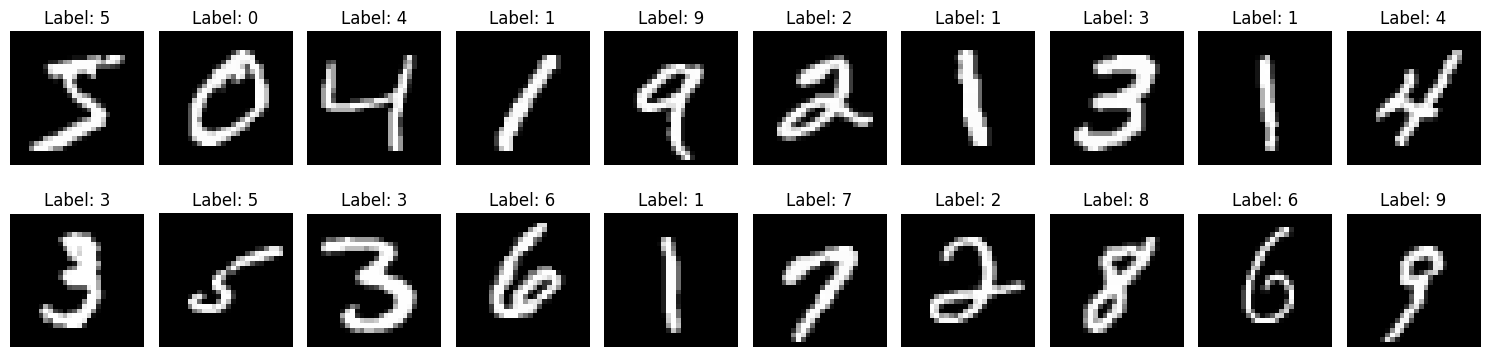

In [6]:

# 1. Print the labels to the console (as requested)
print("Labels for the first 20 digits:")
print(y[:20])

# 2. Visualize the images
# We create a figure with 2 rows and 10 columns to fit 20 images
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
axes = axes.flatten() # Flattens the 2x10 grid into a single list of 20 axes

for i in range(20):
    # Display the image using a grayscale colormap
    axes[i].imshow(X[i], cmap='gray')

    # Add the label as a title for each subplot
    axes[i].set_title(f"Label: {y[i]}")

    # Remove x and y ticks for a cleaner view
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Check what type of object holds the data
print(f"Data Type: {type(X)}")

# Check the dimensions of the full stack
# Expect (70000, 28, 28) -> (Count, Height, Width)
print(f"X (Images) Shape: {X.shape}")

# Check the dimensions of the labels
# Expect (70000,) -> Just a long list
print(f"y (Labels) Shape: {y.shape}")

# Check a single image (the first one)
# Expect (28, 28)
print(f"First Image Shape: {X[0].shape}")


Data Type: <class 'numpy.ndarray'>
X (Images) Shape: (70000, 28, 28)
y (Labels) Shape: (70000,)
First Image Shape: (28, 28)


In [8]:
image_matrix = X[0]

df = pd.DataFrame(image_matrix)

df



,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Action 1.1: Flatten the 3D stack into a 2D matrix
# We calculate n_samples (70000) and use -1 to let NumPy automatically calculate the 784 columns
n_samples = len(X)
X_flat = X.reshape(n_samples, -1)

# Verify the transformation
print(f"Original Shape: {X.shape}")
print(f"Flattened Shape: {X_flat.shape}")

Original Shape: (70000, 28, 28)
Flattened Shape: (70000, 784)


In [10]:
# Action 1.2: Scale the data to range [0, 1]
# We cast to float32 first to ensure decimal division, then divide by 255
X_scaled = X_flat.astype('float32') / 255.0

# Verify the scaling
print(f"Min pixel value: {X_scaled.min()}")
print(f"Max pixel value: {X_scaled.max()}")

Min pixel value: 0.0
Max pixel value: 1.0


In [17]:
from sklearn.model_selection import cross_val_score

# Action 5.1: Manual Trade-off Experiment
# We test all 3 values to find the balance between Accuracy and Sparsity

C_values = [0.001, 0.01, 0.1, 1, 10]
accuracies = []
sparsities = []

print(f"{'C-Value':<10} | {'Accuracy':<10} | {'Sparsity %':<10}")
print("-" * 40)

for c_val in C_values:
    # Initialize with 'elasticnet' and 'l1_ratio=1' to force strict Lasso
    clf = LogisticRegression(
        l1_ratio=1,
        C=c_val,
        solver='saga',
        tol=0.1,
        random_state=42
    )

    # 1. Get Accuracy (Mean of 5-Fold CV)
    cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1)
    acc = cv_scores.mean()
    accuracies.append(acc)

    # 2. Get Sparsity (Must fit on full data to count zeros)
    clf.fit(X_scaled, y)
    sparsity = np.mean(clf.coef_ == 0) * 100
    sparsities.append(sparsity)

    print(f"{c_val:<10} | {acc:.4f}     | {sparsity:.2f}%")

print("-" * 40)

C-Value    | Accuracy   | Sparsity %
----------------------------------------
0.001      | 0.7381     | 90.78%
0.01       | 0.8855     | 68.01%
0.1        | 0.9166     | 46.80%
1          | 0.9215     | 29.95%
10         | 0.9217     | 20.48%
----------------------------------------


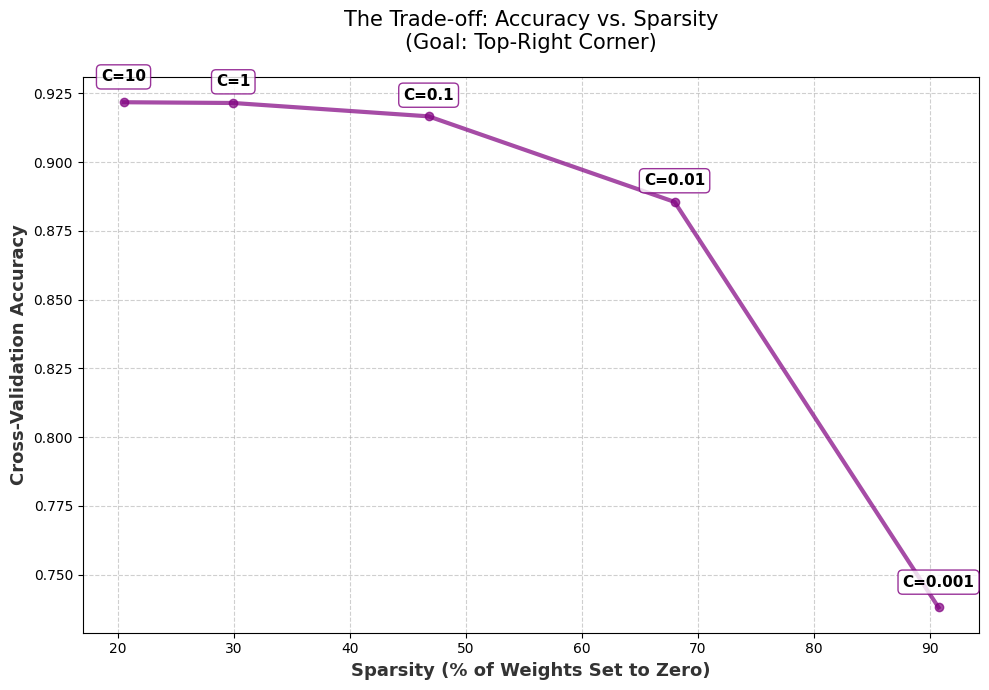

In [21]:
# Action 5.6 (Revised): The Final Trade-off Visualization (Pareto Frontier)
# We assume 'C_values', 'accuracies', and 'sparsities' exist from the previous run.

plt.figure(figsize=(10, 7))
ax = plt.gca()

# 1. Plot the main line connecting the points
# This shows the "Efficient Frontier"
ax.plot(sparsities, accuracies, marker='o', linestyle='-', color='purple', linewidth=3, alpha=0.7)

# 2. Annotate each point with its specific C-value
# This is crucial so we know which dot is which model.
for i, c_val in enumerate(C_values):
    # Adjust text position slightly based on where it is on the curve
    xytext = (0, 12) if i > 0 and i < len(C_values)-1 else (0, 15)

    ax.annotate(f"C={c_val}",
                 (sparsities[i], accuracies[i]),
                 textcoords="offset points",
                 xytext=xytext,
                 ha='center',
                 fontsize=11,
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="purple", alpha=0.8))

# 3. Formatting the Graph
ax.set_xlabel('Sparsity (% of Weights Set to Zero)', fontsize=13, fontweight='bold', color='#333333')
ax.set_ylabel('Cross-Validation Accuracy', fontsize=13, fontweight='bold', color='#333333')
ax.set_title('The Trade-off: Accuracy vs. Sparsity\n(Goal: Top-Right Corner)', fontsize=15, pad=20)

# Add grid lines that match the ticks
ax.grid(True, linestyle='--', alpha=0.6, which='both')

# Invert X-axis so "more sparse" (better) is on the right
# This makes the "Top-Right" goal intuitive.
# Uncomment the next line if your points are moving left instead of right
# ax.invert_xaxis()

plt.tight_layout()
plt.show()

Training Model 1 (C=0.1)...


C:\Users\Cameron\OneDrive\Desktop\Stage 3\MachineLearningMNIST\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Training Model 2 (C=0.01)...


C:\Users\Cameron\OneDrive\Desktop\Stage 3\MachineLearningMNIST\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


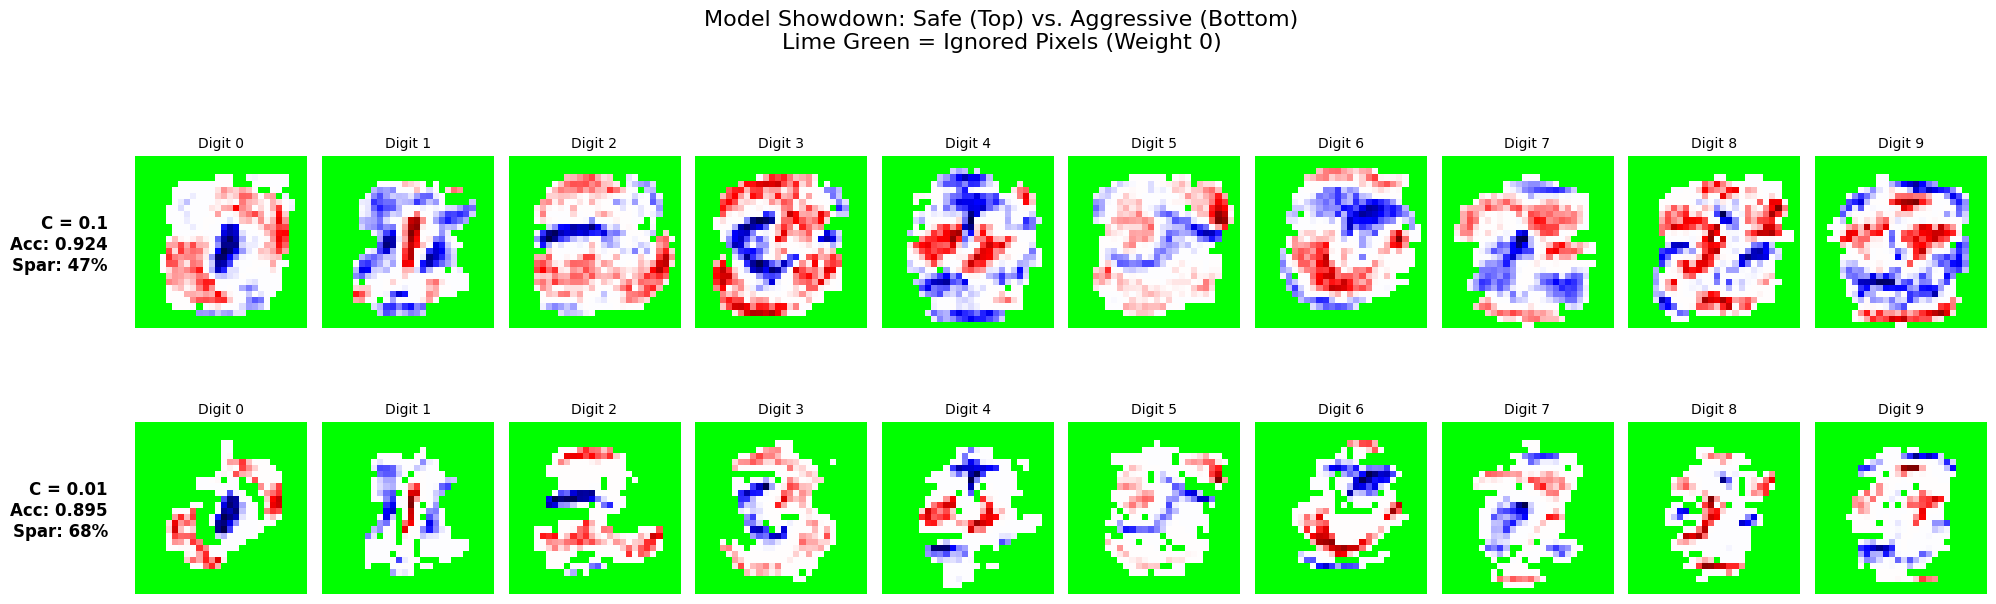

In [26]:
import copy
# Action 5.7 (Revised V2): Full Comparison with Accuracy in Side Labels

# 1. Setup the Lime Green Colormap
my_cmap = copy.copy(plt.cm.seismic)
my_cmap.set_bad(color='lime')

# 2. Initialize Figure: 2 Rows (Models) x 10 Columns (Digits)
fig, axes = plt.subplots(2, 10, figsize=(20, 7))  # Slightly taller to fit the text

# --- MODEL 1: C = 0.1 (The Balanced Choice) ---
print("Training Model 1 (C=0.1)...")
clf_safe = LogisticRegression(penalty='elasticnet', l1_ratio=1, C=0.1, solver='saga', tol=0.1, random_state=42)
clf_safe.fit(X_scaled, y)
coefs_safe = clf_safe.coef_
sparsity_safe = np.mean(coefs_safe == 0) * 100
acc_safe = clf_safe.score(X_scaled, y)

# Plot Row 1
for i in range(10):
    ax = axes[0, i]
    weights = coefs_safe[i].reshape(28, 28)
    masked = np.ma.masked_where(weights == 0, weights)
    limit = np.max(np.abs(weights))
    ax.imshow(masked, cmap=my_cmap, vmin=-limit, vmax=limit)
    ax.set_title(f"Digit {i}", fontsize=10)
    ax.axis('off')

# Label for Row 1 (Added Accuracy)
axes[0, 0].text(-5, 14,
                f"C = 0.1\nAcc: {acc_safe:.3f}\nSpar: {sparsity_safe:.0f}%",
                fontsize=12, fontweight='bold', va='center', ha='right')


# --- MODEL 2: C = 0.01 (The Aggressive Choice) ---
print("Training Model 2 (C=0.01)...")
clf_aggr = LogisticRegression(penalty='elasticnet', l1_ratio=1, C=0.01, solver='saga', tol=0.1, random_state=42)
clf_aggr.fit(X_scaled, y)
coefs_aggr = clf_aggr.coef_
sparsity_aggr = np.mean(coefs_aggr == 0) * 100
acc_aggr = clf_aggr.score(X_scaled, y)

# Plot Row 2
for i in range(10):
    ax = axes[1, i]
    weights = coefs_aggr[i].reshape(28, 28)
    masked = np.ma.masked_where(weights == 0, weights)
    limit = np.max(np.abs(weights))
    ax.imshow(masked, cmap=my_cmap, vmin=-limit, vmax=limit)
    ax.set_title(f"Digit {i}", fontsize=10)
    ax.axis('off')

# Label for Row 2 (Added Accuracy)
axes[1, 0].text(-5, 14,
                f"C = 0.01\nAcc: {acc_aggr:.3f}\nSpar: {sparsity_aggr:.0f}%",
                fontsize=12, fontweight='bold', va='center', ha='right')

plt.suptitle("Model Showdown: Safe (Top) vs. Aggressive (Bottom)\nLime Green = Ignored Pixels (Weight 0)", fontsize=16)
plt.tight_layout()
plt.show()